# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* *either* "supervised machine learning with penguins" or "employee turnover".


---

# Unsupervised machine learning with penguins

The palmer penguin dataset is excellent for EDA and UML. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

## The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Create a new dataset where you scale all numeric values with the standardscaler.
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

## Data and libraries

In [62]:
# standard packaging

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co

from IPython.display import HTML #Youtube embed

In [2]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

## Data Inspection and visualization

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
species_short        344 non-null object
island               344 non-null object
culmen_length_mm     342 non-null float64
culmen_depth_mm      342 non-null float64
flipper_length_mm    342 non-null float64
body_mass_g          342 non-null float64
sex                  334 non-null object
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
penguins.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [9]:
penguins.species_short.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species_short, dtype: int64

In [32]:
pd.crosstab(penguins.species_short, penguins.island, normalize=True)

island,Biscoe,Dream,Torgersen
species_short,,,
Adelie,0.127907,0.162791,0.151163
Chinstrap,0.000000,0.197674,0.000000
Gentoo,0.360465,0.000000,0.000000


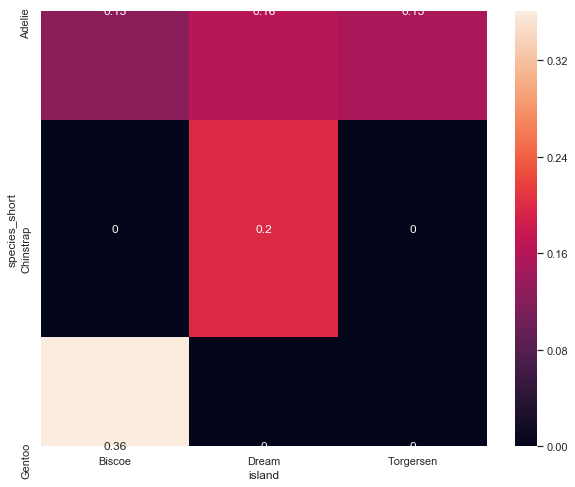

In [30]:
sns.heatmap(pd.crosstab(penguins.species_short, penguins.island, normalize=True), annot=True)

/Users/jakoblaage-thomsen/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/jakoblaage-thomsen/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


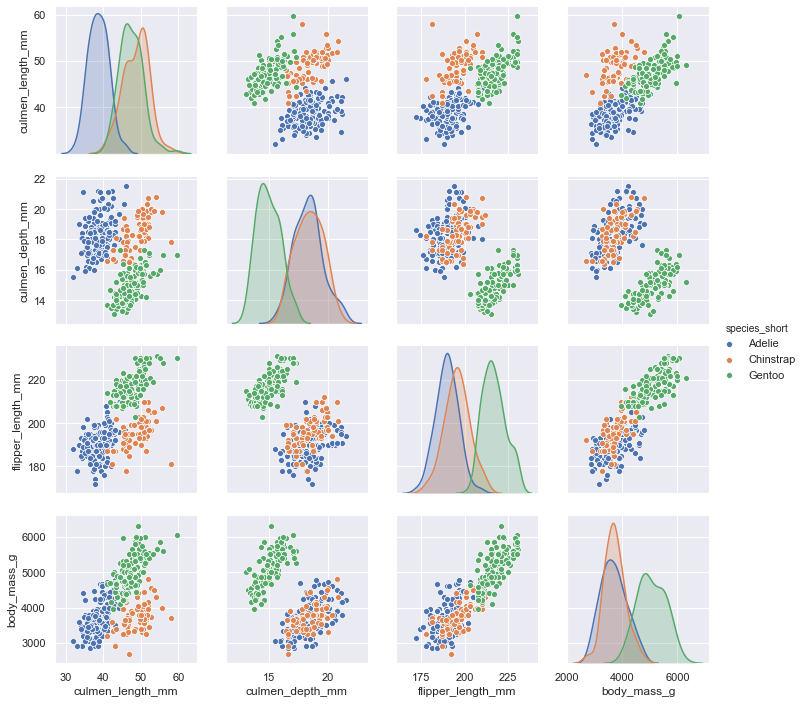

In [36]:
sns.pairplot(penguins, hue='species_short')

/Users/jakoblaage-thomsen/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/jakoblaage-thomsen/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


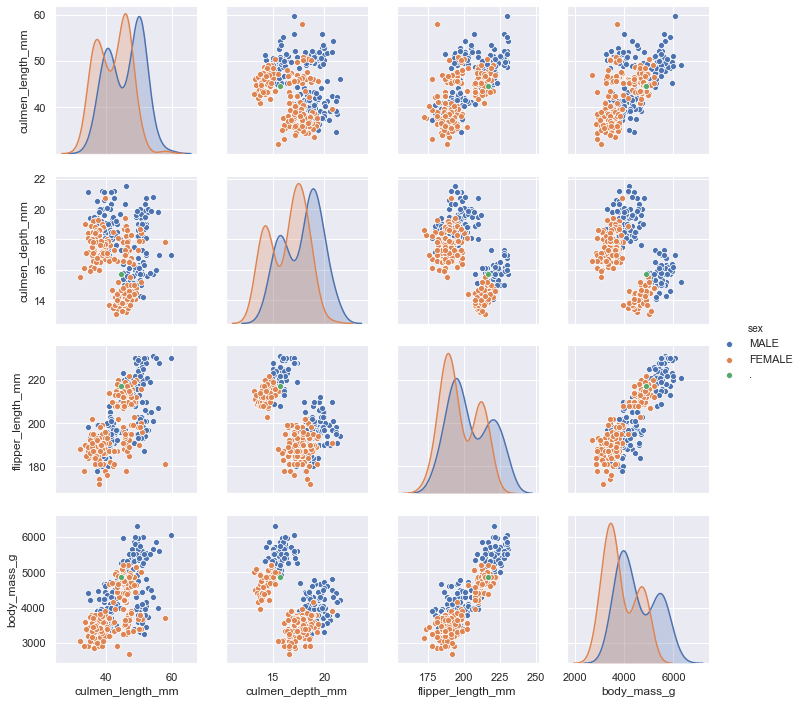

In [37]:
sns.pairplot(penguins, hue='sex')

***Summary:***
So basically we have a dataset of 344 penguins of three species from three islands. We have some missing values. For 2 observations we miss the numerical data, for 10 observations we miss the sex.

The penguins are distributed in an interesting way betwee the islands. Adelie is evenly split along all three islands. Chinstrap only exists on Dream island, and Gentoo only on Biscoe.

In terms of characteristics, Gentoos' on average have higher body-mass and flipper length, and shorter culmen depth than the other two species that are very similar in this regard. However, in terms of Culmen length, Adelies' have the shortest bills, while Chinstraps and gentoos are more similar in this regard.

It seems that for all species, males are associated with larger sizes of all characteristics.

## Rescale dataset

3. Create a new dataset where you scale all numeric values with the standardscaler.

In [22]:
penguins_preproc = penguins.set_index(['species_short', 'island','sex'])
penguins_preproc = penguins_preproc.dropna()

In [23]:
# standard scaling useing sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # defines an object that is a scaler model.
penguins_scaled = scaler.fit_transform(penguins_preproc) # convenience function; fits AND transforms at the same time

In [31]:
#remove scientific notation
np.set_printoptions(precision=None, suppress=True) # Removes scientific notation
pd.options.display.float_format = '{:.4f}'.format

In [32]:
# new mean and std.
pd.DataFrame(penguins_scaled, columns=penguins_preproc.columns).describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.0000,342.0000,342.0000,342.0000
mean,0.0000,-0.0000,-0.0000,0.0000
std,1.0015,1.0015,1.0015,1.0015
min,-2.1685,-2.0544,-2.0593,-1.8754
25%,-0.8616,-0.7866,-0.7774,-0.8139
50%,0.0969,0.0755,-0.2788,-0.1895
75%,0.8398,0.7854,0.8607,0.6846
max,2.8759,2.2054,2.1426,2.6202


## PCA analysis
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

In [83]:
# Run PCA model
from sklearn.decomposition import PCA
model = PCA(n_components=3)
#because there are only four variables, the model cannot have more than "n_components=4"
model.fit(penguins_scaled) # Fits the model
penguins_reduced = model.transform(penguins_scaled) #transform the data using the model

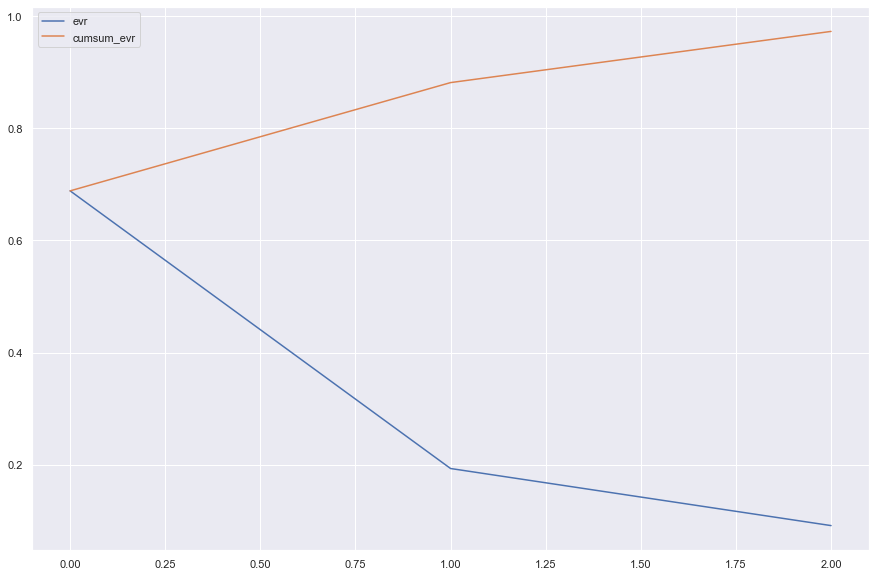

In [84]:
# investigate explained variance
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

The plot above seems to have "an elbow" at the value 1 (where n_components=2), however, I keep the components at three, only reducing dimensionality by one

In [85]:
# create dataframe with PCA reduced data using 
penguins_PCA = pd.DataFrame(penguins_reduced, columns = ['PC1','PC2','PC3'])
penguins_PCA.set_index(penguins_preproc.index, inplace=True)
penguins_PCA.reset_index(inplace=True)

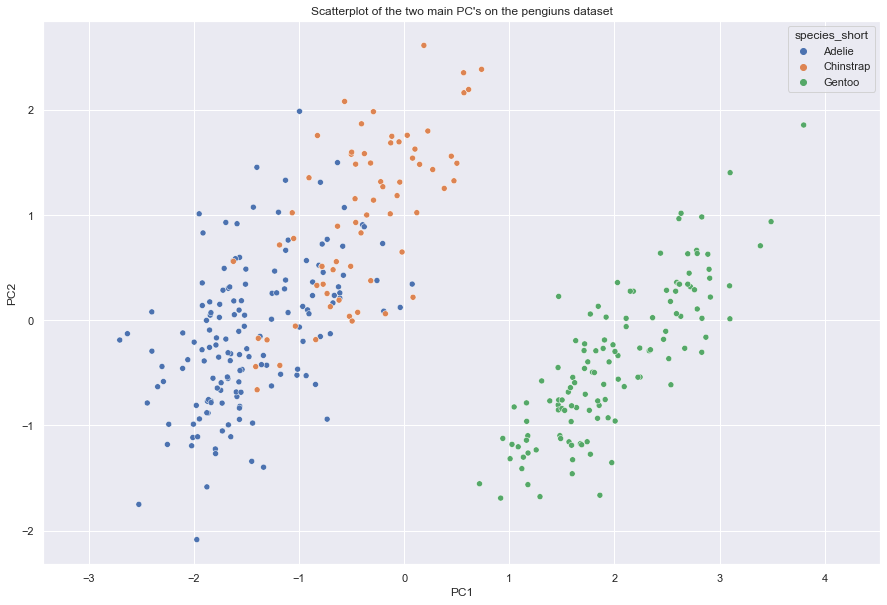

In [86]:
#Scatterplot of the first two components
sns.scatterplot(x = penguins_PCA['PC1'], y = penguins_PCA['PC2'], hue='species_short', data=penguins_PCA)
plt.axis('equal')
plt.title("Scatterplot of the two main PC's on the pengiuns dataset")
plt.show()


The first and second component reveals a quite clear distinction between the species Gentoo and the two others.

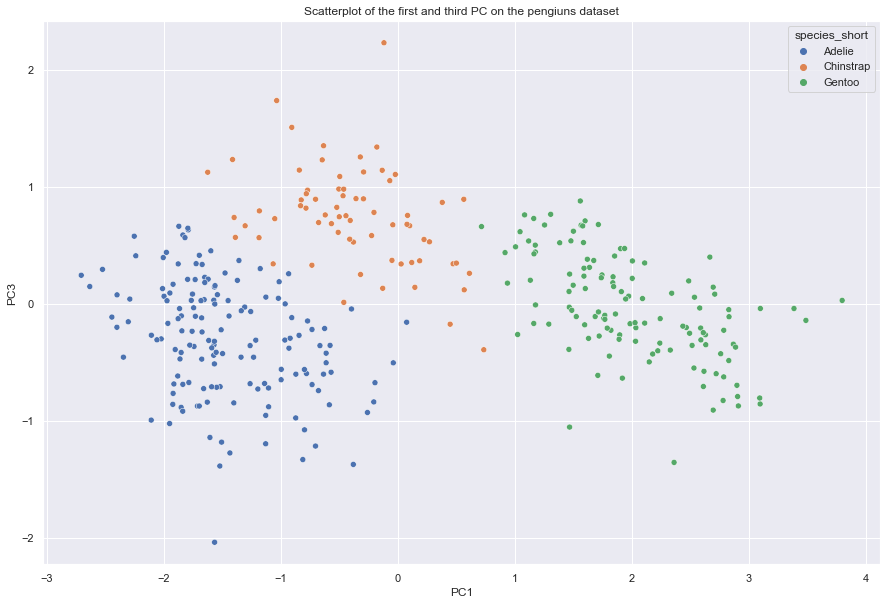

In [87]:
#Scatterplot of the first and third components
sns.scatterplot(x = penguins_PCA['PC1'], y = penguins_PCA['PC3'], hue='species_short', data=penguins_PCA)
plt.title("Scatterplot of the first and third PC on the pengiuns dataset")
plt.axis('equal')
plt.show()


Adding the third component seems to provide a clearer seperation betwen the Adele and Chinstrap species.

In [88]:
# which variables do the components load on? 
pcscores = pd.DataFrame(penguins_reduced)
loadings = pd.DataFrame(model.components_, columns=penguins_preproc.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

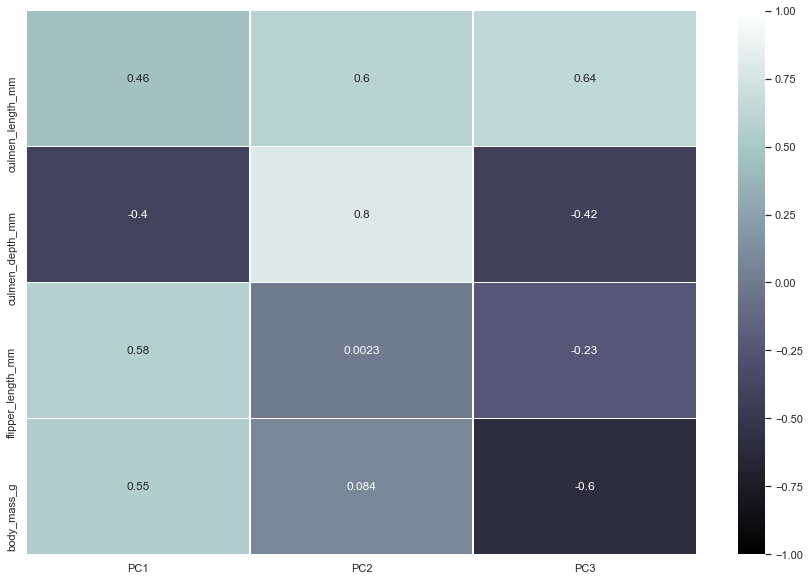

In [89]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

So PC1 one loads almost evenly on all features (although inversely on culmen depth), PC2 primarily on culmen depth and culmen length, and PC3 primarily on body mass, culmen length and (inversely) ob culmen depth

---

# Supervised machine learning with penguins

This assignment uses the same data as for "unsupervised machine learning with penguins". 

If you created solutions for "unsupervised machine learning with penguins", jump to assignment 3.

## The assignment

3. Apply stanbdard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)
4. Split the data in a train & test sample
5. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.
   * Use first a logistic regression to do so.
   * Then, use 2-3 more complex model classes of your choice.

## Load data split data

In [99]:
# The data is already preprocessed, for now I avoid looking at sex as variable (altough there is a lot of information there)
print(penguins_scaled)
print(penguins_preproc.head)

[[-0.88449874  0.78544923 -1.41834665 -0.56414208]
 [-0.81112573  0.1261879  -1.06225022 -0.50170305]
 [-0.66437972  0.43046236 -0.42127665 -1.18853234]
 ...
 [ 1.18828874 -0.73592307  1.50164406  1.93341896]
 [ 0.23443963 -1.19233476  0.7894512   1.24658968]
 [ 1.09657248 -0.53307343  0.86067049  1.49634578]]
<bound method NDFrame.head of                                 culmen_length_mm  culmen_depth_mm  \
species_short island    sex                                         
Adelie        Torgersen MALE             39.1000          18.7000   
                        FEMALE           39.5000          17.4000   
                        FEMALE           40.3000          18.0000   
                        FEMALE           36.7000          19.3000   
                        MALE             39.3000          20.6000   
...                                          ...              ...   
Gentoo        Biscoe    FEMALE           47.2000          13.7000   
                        FEMALE       

In [111]:
# The dependent variable is the species, we can use OHE to transform this into a matrix of binary variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_enc = encoder.fit_transform(penguins_preproc.index.get_level_values('species_short'))

In [117]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(penguins_scaled, y_enc, test_size = 0.2, random_state = 42, stratify=y_enc) 

# I specify "stratify" on y_enc to ensure that test and train sets are split somewhat evenly according to species

## Train classification model

In [120]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

### Linear regression model

In [121]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000) # why 2000 iterations

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[1.         0.96363636 1.         0.98148148 0.98148148]


In [122]:
#so very close to perfect on K-folds
# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

1.0


In [123]:
#Performance is pretty high with just the linear model
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform on the encoder for regions

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names = target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



(<Figure size 1080x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fccd87e3f90>)

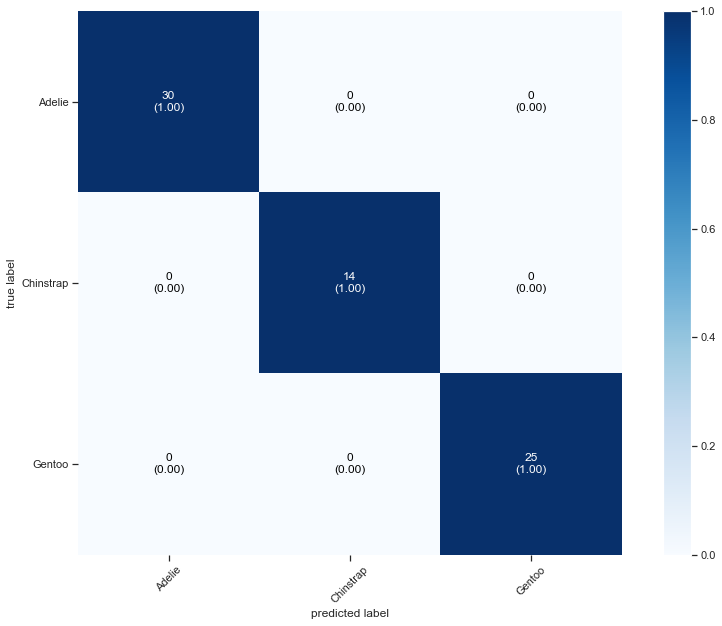

In [124]:
# Looking at confusion matrix (which should be very simple)

# Import plotter:
from mlxtend.plotting import plot_confusion_matrix
#Import matrix module:
from sklearn.metrics import confusion_matrix
# It's actually just a cross-tab of predicted vs. real values

# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names=target_names)

### Random forest modet model

Despite the perfect predictions of the linear model, we also apply a random forest model

In [125]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier() #empty model

scores = cross_val_score(model, X_train, y_train, cv = 5) # trains model on data
print(scores)

[0.96363636 0.96363636 0.98181818 0.96296296 1.        ]


In [126]:
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

1.0


In [127]:
#Performance report
target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



(<Figure size 1080x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fccd8816d10>)

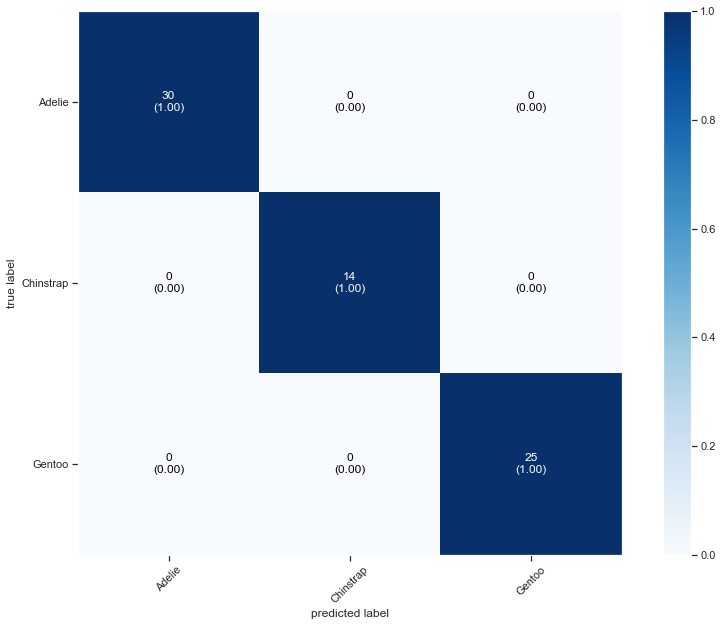

In [128]:
# Confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)